<a href="https://colab.research.google.com/github/rajprasad001/deep_learning_concepts/blob/master/Project_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Assignment

 ## Importing Dependencies(Libraries)

Major Libraries Used : TensorFlow, Keras, scikit-learn, matplotlib, NumPy

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.datasets import fashion_mnist
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, layers, models

## Loading and Splitting Data

We will be using 2 different dataset for the completion of the assignments
1. CIFAR10
2. Fashion MNIST

### Loading and Splitting CIFAR10 DATA into Train, Validation and Test 

In [2]:
#Splitting the data into Train and Test. The Test Data should be completely unseen.
#By default 10000 instances are used as test data in Cifar10
(cifar_train_x_temp, cifar_train_y_temp), (cifar_test_x , cifar_test_y) =cifar10.load_data() 

#Further, for hyperparameter tuning, 20% of the train data is futher split into train and validation data
cifar_train_x, cifar_val_x, cifar_train_y, cifar_val_y = train_test_split(cifar_train_x_temp, cifar_train_y_temp, test_size=0.20, random_state=42)

#Standardizing the dataset
cifar_train_x, cifar_val_x, cifar_test_x = cifar_train_x/255.0, cifar_val_x/255.0, cifar_test_x/255.0

In [3]:
print('cifar10 train data      : {}'.format(cifar_train_x.shape))
print('cifar10 validation data : {}'.format(cifar_val_x.shape))
print('cifar10 test data       : {}'.format(cifar_test_x.shape))

cifar10 train data      : (40000, 32, 32, 3)
cifar10 validation data : (10000, 32, 32, 3)
cifar10 test data       : (10000, 32, 32, 3)


In [4]:
#Standardizing the train dataset
#cifar_train_y = cifar_train_y.reshape((-1))
#cifar_train_x = tf.data.Dataset.from_tensor_slices((cifar_train_x.reshape([-1,32,32,3]).astype(np.float32)/255, cifar_train_y.astype(np.int32)))

#Standardizing the validation dataset
#cifar_val_y = cifar_val_y.reshape((-1))
#cifar_val_x = tf.data.Dataset.from_tensor_slices((cifar_val_x.reshape([-1,32,32,3]).astype(np.float32)/255, cifar_val_y.astype(np.int32)))

#Standardizing the test dataset
#cifar_test_y = cifar_test_y.reshape((-1))
#cifar_test_x = tf.data.Dataset.from_tensor_slices((cifar_test_x.reshape([-1,32,32,3]).astype(np.float32)/255, cifar_test_y.astype(np.int32)))

### Loading and Splitting MNIST FASHION DATA into Train, Validation and Test

In [5]:
(mnist_train_x_temp, mnist_train_y_temp), (mnist_test_x , mnist_test_y) =fashion_mnist.load_data() 
#Splitting the data into Train and Test. The Test Data should be completely unseen.
#By default 10000 instances are used as test data in Fashion Mnist
mnist_train_x, mnist_val_x, mnist_train_y, mnist_val_y = train_test_split(mnist_train_x_temp, mnist_train_y_temp, test_size=0.20, random_state=42)
#Further, for hyperparameter tuning, 20% of the train data is futher split into train and validation data

In [6]:
print('MNIST FASHION train data      : {}'.format(mnist_train_x.shape))
print('MNIST FASHION validation data : {}'.format(mnist_val_x.shape))
print('MNIST FASHION test data       : {}'.format(mnist_test_x.shape))

MNIST FASHION train data      : (48000, 28, 28)
MNIST FASHION validation data : (12000, 28, 28)
MNIST FASHION test data       : (10000, 28, 28)


In [7]:
#Standardizing the train dataset
#mnist_train_y = mnist_train_y.reshape((-1))
#cifar_train_x = tf.data.Dataset.from_tensor_slices((mnist_train_x.reshape([-1,32,32,3]).astype(np.float32)/255, mnist_train_y.astype(np.int32)))

#Standardizing the validation dataset
#mnist_val_y = mnist_val_y.reshape((-1))
#mnist_val_x = tf.data.Dataset.from_tensor_slices((mnist_val_x.reshape([-1,32,32,3]).astype(np.float32)/255, mnist_val_y.astype(np.int32)))

#Standardizing the test dataset
#mnist_test_y = mnist_test_y.reshape((-1))
#mnist_test_x = tf.data.Dataset.from_tensor_slices((mnist_test_x.reshape([-1,32,32,3]).astype(np.float32)/255, mnist_test_y.astype(np.int32)))


## Task 1: Optimizers

### Task 1 Description

* Motivation    : Analyze the affect of different Optimizers on the training behaviour
  
 * Optimizer 1: Adadelta,
 * Optimizer 2: Adagrad
 * Optimizer 3: Adam)
 * Optimizer 4: Adamax,
 * Optimizer 5: Ftrl,
 * Optimizer 6: Nadam,
 * Optimizer 7: SGD

* Dataset       :
 * Cifar10, 
 *MNIST Fashion

* Architecture  :
 * Basic Convolutional Neural Network
 * Resnet
 * InceptionNet
 * Densely Connected Convolutional Neural Network

* Comparision Criteria : Training Curve
 * Steps unitll convergence
 * Training Accuracy 
 * Loss
 * Stability of Training


### TASK 1.1 BASIC Convolutional Neural Network

In [8]:
cnn_model = models.Sequential()
cnn_model.add(layers.Conv2D(8,(3,3),padding = 'SAME', activation='relu', input_shape = (32,32,3)))
cnn_model.add(layers.MaxPool2D((2,2)))
cnn_model.add(layers.Conv2D(16,(3,3),padding = 'SAME', activation='relu'))
cnn_model.add(layers.MaxPool2D((2,2)))
cnn_model.add(layers.Conv2D(32,(3,3),padding = 'SAME', activation='relu'))
cnn_model.add(layers.MaxPool2D((2,2)))
cnn_model.add(layers.Conv2D(128,(3,3),padding = 'SAME', activation='relu'))
cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(10))
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 8)         224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 32)          4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 128)         3

Epoch 1/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.6050 - accuracy: 0.4152 - val_loss: 1.3495 - val_accuracy: 0.5146
Epoch 2/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.2517 - accuracy: 0.5535 - val_loss: 1.1764 - val_accuracy: 0.5869
Epoch 3/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.0993 - accuracy: 0.6113 - val_loss: 1.0707 - val_accuracy: 0.6255
Epoch 4/10
1250/1250 [==============================] - 4s 3ms/step - loss: 0.9854 - accuracy: 0.6530 - val_loss: 1.0249 - val_accuracy: 0.6462
Epoch 5/10
1250/1250 [==============================] - 4s 3ms/step - loss: 0.8943 - accuracy: 0.6853 - val_loss: 0.9603 - val_accuracy: 0.6680
Epoch 6/10
1250/1250 [==============================] - 4s 3ms/step - loss: 0.8173 - accuracy: 0.7145 - val_loss: 0.9621 - val_accuracy: 0.6703
Epoch 7/10
1250/1250 [==============================] - 4s 3ms/step - loss: 0.7591 - accuracy: 0.7349 - val_loss: 0.9574 - val_accuracy:

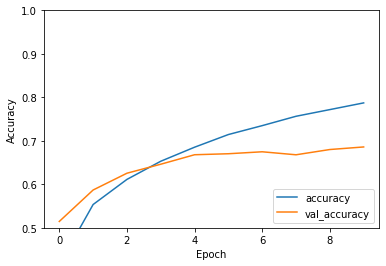

In [9]:
cnn_model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
history = cnn_model.fit(cifar_train_x, cifar_train_y, epochs=10, validation_data=(cifar_val_x, cifar_val_y))
  
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = cnn_model.evaluate(cifar_test_x,  cifar_test_y, verbose=2)
print('Test Data Loss : {}, Test Data Accuracy : {}'.format(test_loss,test_acc))

## Task 2 : Reqularization

* Motivation: Investigate how different Regularization techniques affect the training behavior.

* Dataset : Cifar10

* Architecture : Best model from Task1's architecture

* Regularization techniques:
 * L1, L2 regularizer
 * Dropouts
 * Adding noise

* Comparision Criteria: Training Curves
 * Steps still convergence
 * Training accuracy untill convergence
 * Stability of training


## Task 3: Transfer Learning